## Initial and final contribution for the outreachy-datascience repo 2019 Mozilla <br>

### Table of Contents<br>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#intro1">Important packages and importing them</a></li>
<li><a href="#eda">Exploratory Data Analysis and description</a></li>
<li><a href="#featureneg">Getting numerical and categorical features and handling missing/null values</a></li>
<li><a href="#corr">Correlation Matrix</a></li>
<li><a href="#feat">Feature Engineering</a></li>
<li><a href="#outliers">Taking out outliers</a></li>
<li><a href="#two">Contribution2 : Models to test</a></li>
<li><a href="#conc">Conclusion</a></li>
</ul>

<a id="intro"></a>
## Introdution

### What ??

> The dataset used here is the famous house saleprice data with different attributes including the area of the garage, availability of the swimming pool, location of the house, how saleprice have increased with years etc...
We are trying to understand the structure of the famous house saleprice dataset and perform Exploratory Data Analysis over it, that gives us the clearer picture of main characteristics of the dataset and helps in summarizing it. With the help of EDA, we are also able to formulate the basis of further calculations <br>
The final goal is to complete the <b>PRIMARY TASK</b> i.e. to get the variable that can be single field used to describe the saleprice.

### Why ??

> The goal is to understand and get familiar with basic steps of data analysis, cleaning and juggling with the features and how to use them further for the modelling purpose

### How ??

> <ul>
    <li>Import relevant modules, functions and settings</li>
    <li>Acquiring the dataset, reading it and understanding the different types of datatypes</li>
    <li><b>EDA</b> :  Exploratory Data Analysis</li>
    <li>Extracting different types of features</li>
    <li>Data Cleaning</li>
    <li>Correlation</li>
    <li>Data Wrangling</li>    
    <li>Regression Models</li>
  </ul>

<a id="intro1"></a>
## Imports Functions, Modules, Settings and Data acquiring and reading

In [1]:
#import all the neccessary modules and functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [2]:
data = pd.read_csv('dataset.csv')   #read the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id="eda"></a>
## EDA !!! - Let us begin.

> We are performing <b>Exploratory data analysis</b> because we want to understand how the data is structured. The shape of the data, the number of rows and cols it has, mathematical analysis behind it, how features are related with each other etc... are the questions that can be answered after performing EDA. EDA is the crucial step to get the insights and statistical measure of the dataset that has been provided.
<br>
<br>
Once EDA is completed, the features obtained from it can be used for modelling the machine learning algorithm for the dataset.
<br>
<br>
This EDA has been divided in the following parts :
> <ul>
    <li>Shape, describe and head</li>
    <li>Skewness and Kurtosis of the complete data</li>
    <li>Missing values in the dataset and the corresponding feature distribution</li>
    <li>Visualization of the feature values</li>
    <li>Correlation matrix of the data</li>
    <li>Feature Engineerig and data wrangling</li>
    <li>Outliers Removal</li>
  </ul>

In [3]:
data.describe()  #this function describes the basic statistical details like mean, median, count etc ..

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### There are 1460 rows and 81 cols in the data out of which one col represents ID and one represents the target variable i.e the "SalePrice" feature. Rest 79 are the features determining the task.

In [4]:
def dataframe_shape(df):  #get the number of rows and cols in the dataset along with the shape of the complete data
    print("The dataframe has %d rows" %df.shape[0])
    print("The dataframe has %d columns" %df.shape[1])
    print(data.shape)

dataframe_shape(data)

The dataframe has 1460 rows
The dataframe has 81 columns
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


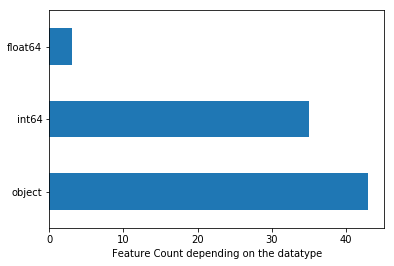

In [5]:
def datatypes_insight(data):  #gives the insight for the type of the dataset whether it is int or float or object type
    display(data.dtypes.to_frame().T)
    data.dtypes.value_counts().plot(kind="barh").set_xlabel('Feature Count depending on the datatype')

datatypes_insight(data)

In [6]:
data = data.drop(['Id'], axis=1)  #drop the id col
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.info() #get the information about the number and datatype of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
data.select_dtypes(include='object').describe() #object type data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
data.select_dtypes(include ='int64').describe() #int type data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data.select_dtypes(include ='float64').describe() #float type data

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


### Plot the curve for skewness and kurtosis of the dataset that will give the idea of the dataset symmetry, of how much the data is away or skewed from the horizontal symmetry (skewness) and of the sharpness/tallness of the peak (kurtosis) in the data

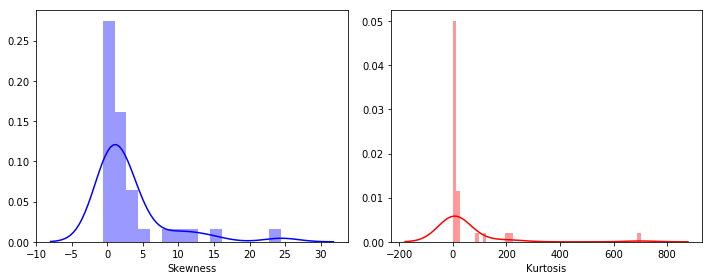

In [11]:
#plot the graph to get the idea about the numerical shape of the data i.e skewness and kurtosis

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

sns.distplot(data.skew(),color='blue',axlabel ='Skewness',ax=ax1) 
sns.distplot(data.kurt(),color='red',axlabel ='Kurtosis',ax=ax2)

plt.tight_layout()

<a id="featureneg"></a>

## FINDING DIFFERENT TYPES OF FEATURES AND HANDLING MISSING/NULL VALUES

### Getting the idea of missing values and fetching the top features with highest missing values

> Due to the unavailability of data or issues like corrupted data etc ..., sometimes the dataset ends up having a lot of or few missing values that cannot be handled by the ML/DL algos. Hence it is neccessary to understand them. Also, it is very neccessary to understand what kind of features are having missing values ex. numerical features can be replaced with either mean or median whereas categorical features will be needing analysis before replacing and handling them. 

In [12]:
#gives the insights about the NaN values and their number with percentage across each attribute

def missed_value(data): 
    
    total_count = data.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)
    percent_count = data.apply(lambda x: sum(x.isnull())/x.isnull().count()).sort_values(ascending=False)
    
    # Ploting and getting the top 20 values the percentage of NAN values if any.
    missing_values = pd.concat([total_count, percent_count], axis=1,join='outer', keys=['Total Count', 'Percent Count'])
    missing_values.index.name ='Features'
    display(missing_values.head(20))

missed_value(data)

,Total Count,Percent Count
Features,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479


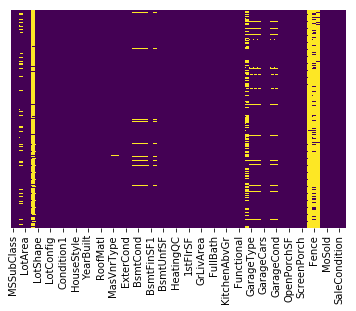

In [13]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis') #plot the heatmap of NaN values to understand the location of the missing values

### Understand the distribution of every feature by plotting their histogram (numerical features are plotted)

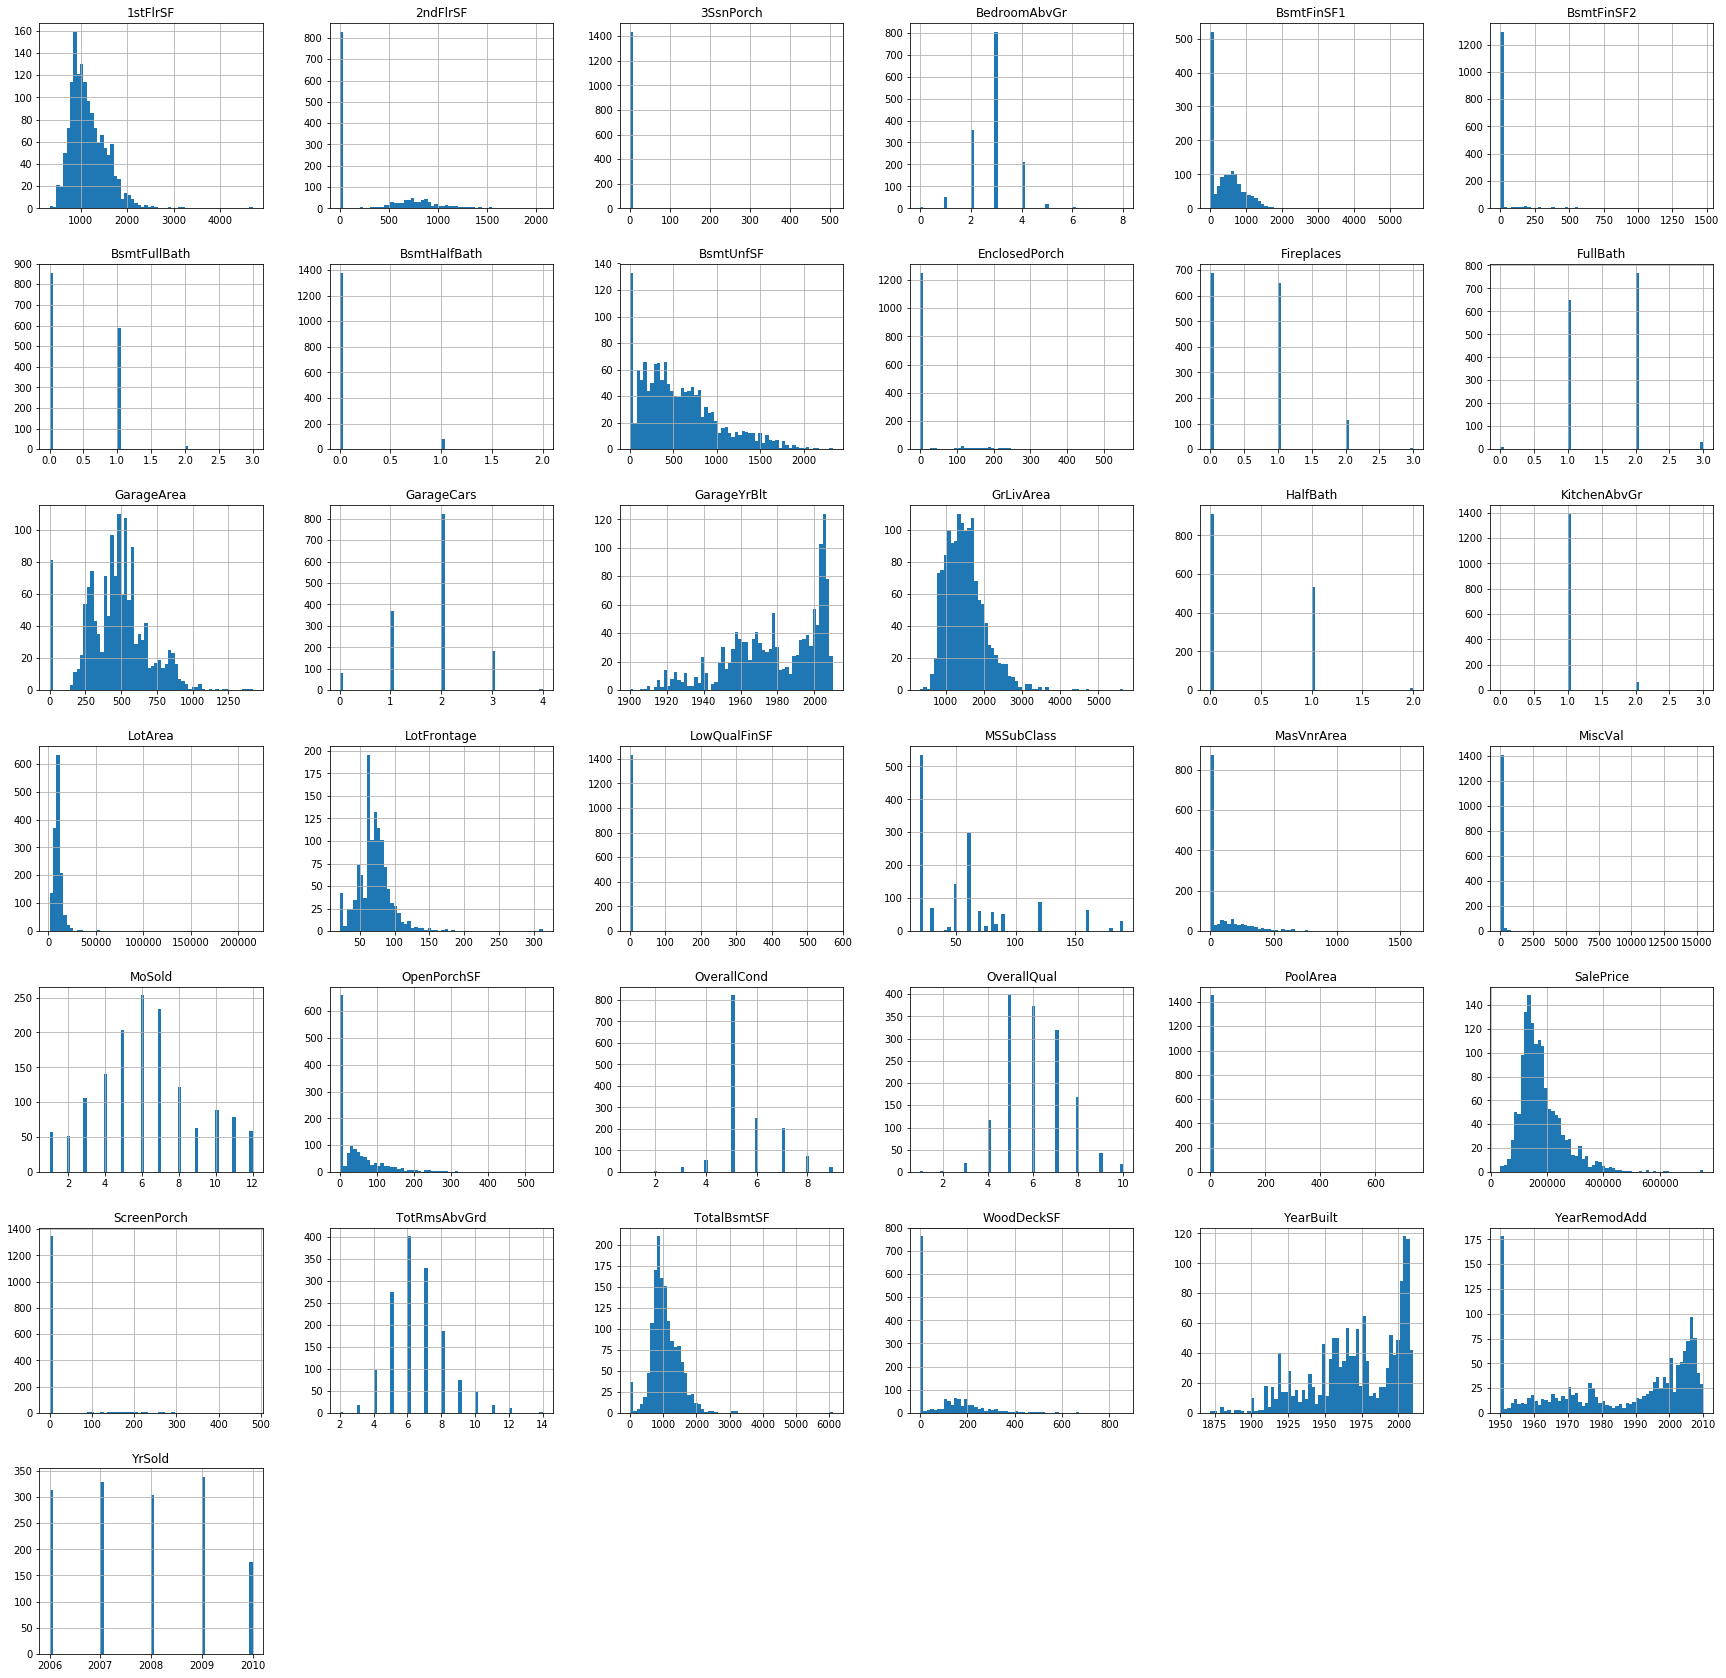

In [14]:
data.hist(figsize=(30, 30), bins=60, xlabelsize=10, ylabelsize=10);

### Correlation matrix Visualization

> To check the movement between the varibales i.e to see whther they move together or not <br> 
Technique used : Pearson Correlation
<br>
<br>
So! We have 80 features (excluding ID column that we already dropped) and we will use thia correlation matrix to understand what features are the closest to each other by the definition of correlation.

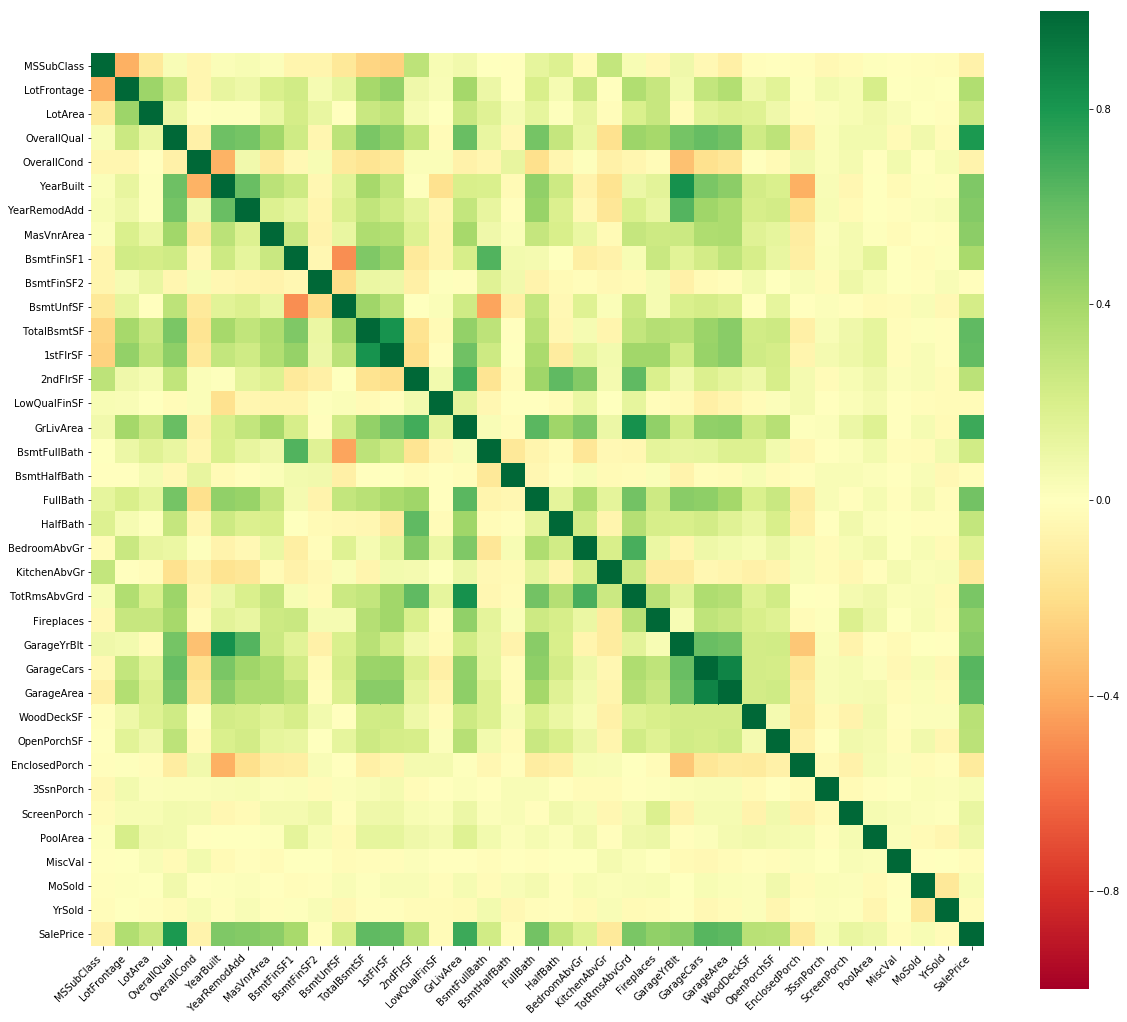

In [15]:
plt.figure(figsize=(20,18))
corr = data.corr()
top_corr_features = corr.index
ax = sns.heatmap(
    data[top_corr_features].corr(), 
    vmin=-1, vmax=1, center=0,
    cmap="RdYlGn",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Identify THOSE FEATURES !!! 

> Identify the different types of features present, whether they are numerical or categorical. It is important to do such analysis as the algorithm will always take the data in the form of numbers to process and analyze the results on the top of them.
<br><br>
Here the dataset has features varying from the area of the garage, lot etc.. that consists of numbers to the text values in features like availability of swimming pools (having yes or no as the answer) or the location of the house that can effect the saleprice. Hence it is always neccessary to look and analyze the different types of features.

In [16]:
#categorize the features on the basis of whether they are numerical or categorical

nf = data.dtypes[data.dtypes != "object"].index
cf = data.dtypes[data.dtypes == "object"].index

print("Total numeric features : ", list(nf) , len(list(nf)))
print("\n")
print("Total categoric features : ", list(cf) , len(list(cf)))

Total numeric features :  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 37


Total categoric features :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional

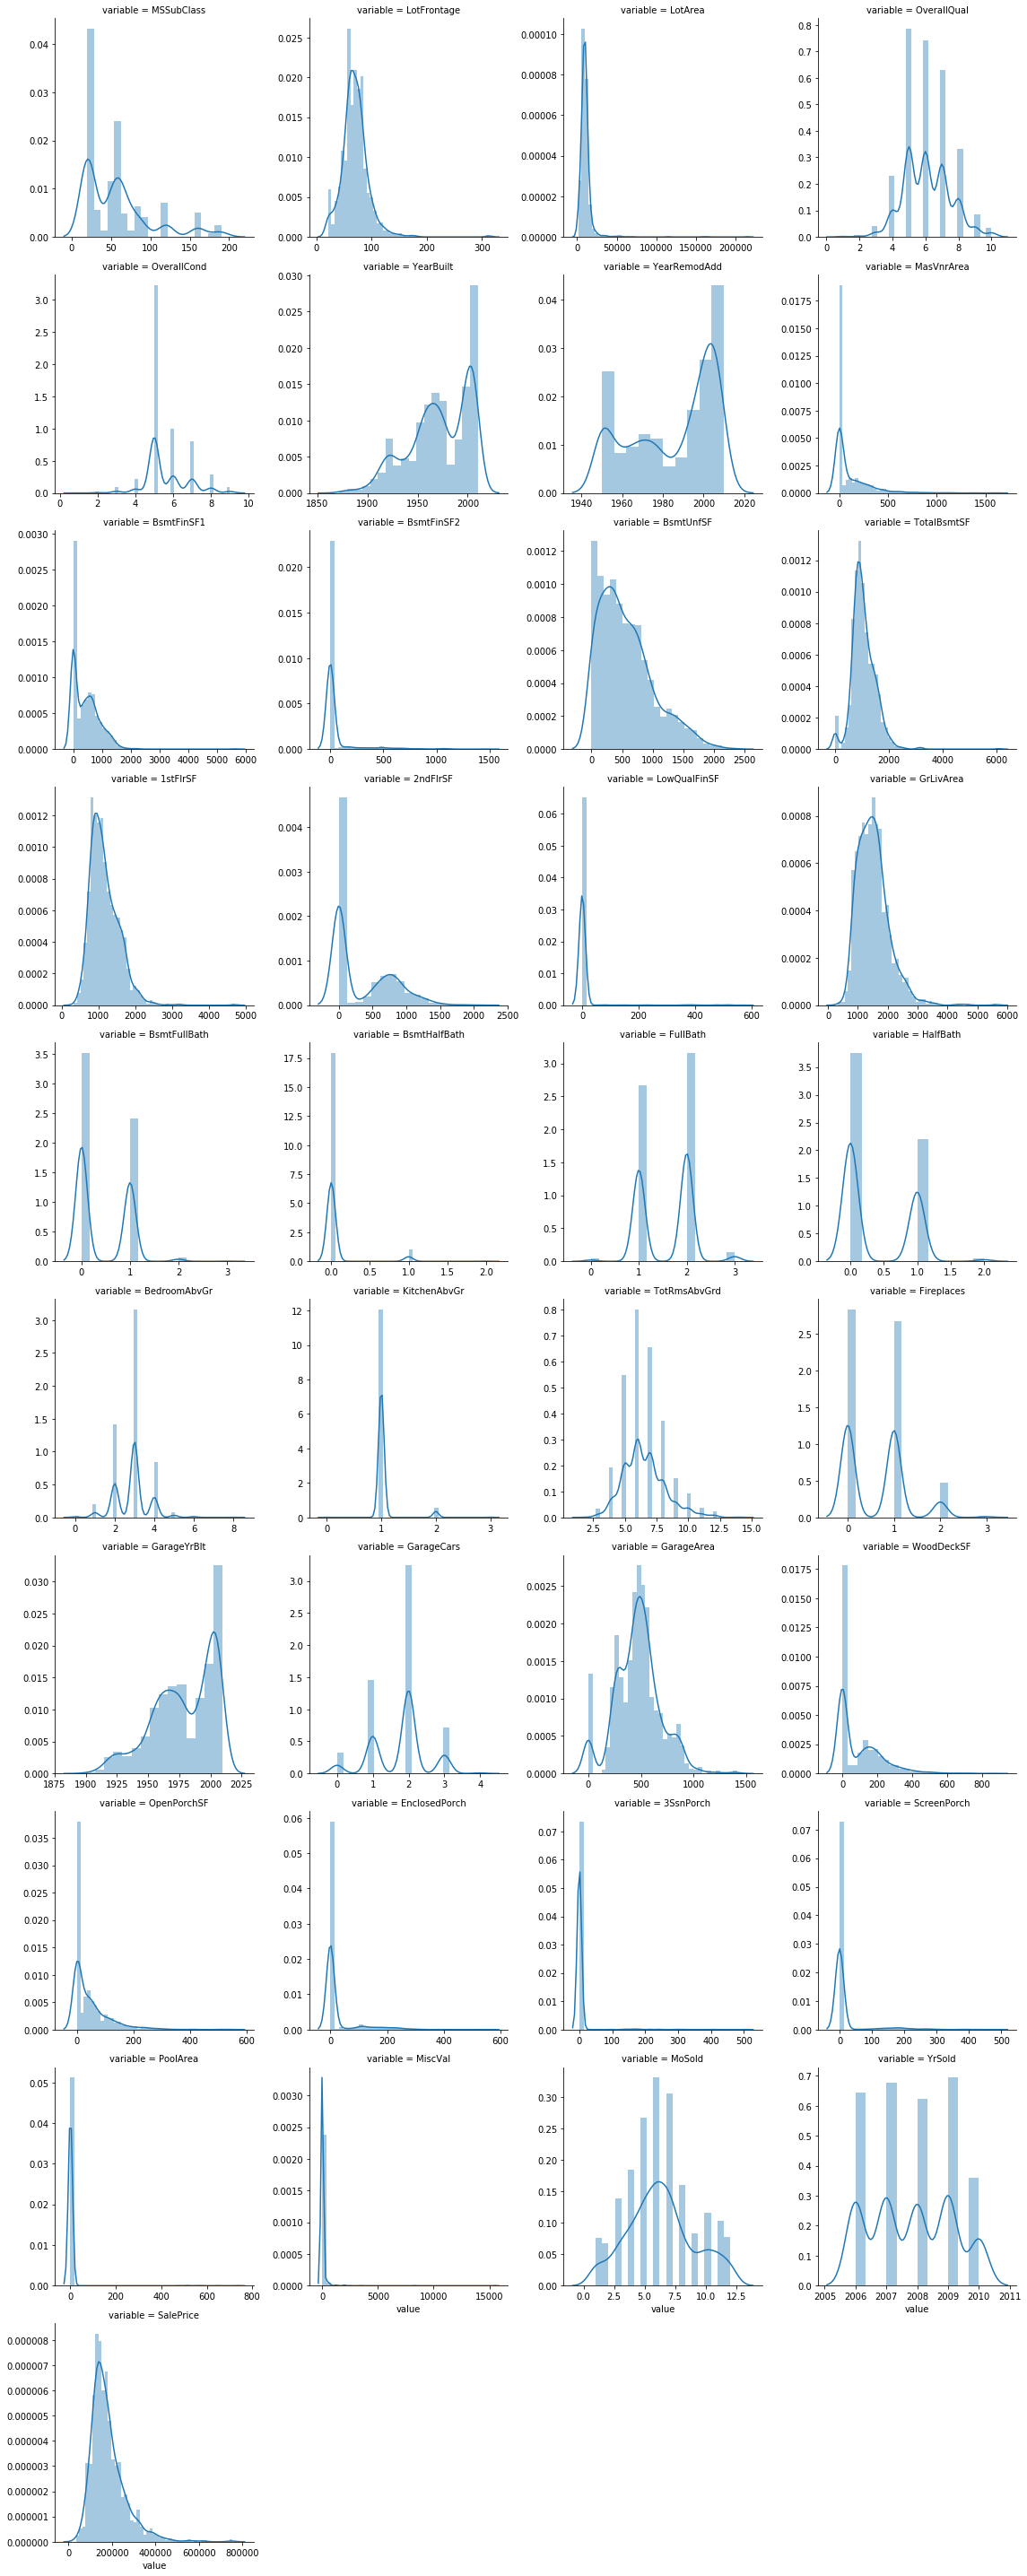

In [17]:
plot1 = pd.melt(data, value_vars=nf)  #numeric features distribution
plot_num = sns.FacetGrid(plot1, col="variable",col_wrap=4, sharex=False, sharey=False, height = 4)
plot_num = plot_num.map(sns.distplot,"value")
plt.show()

/home/riya/phoenix/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


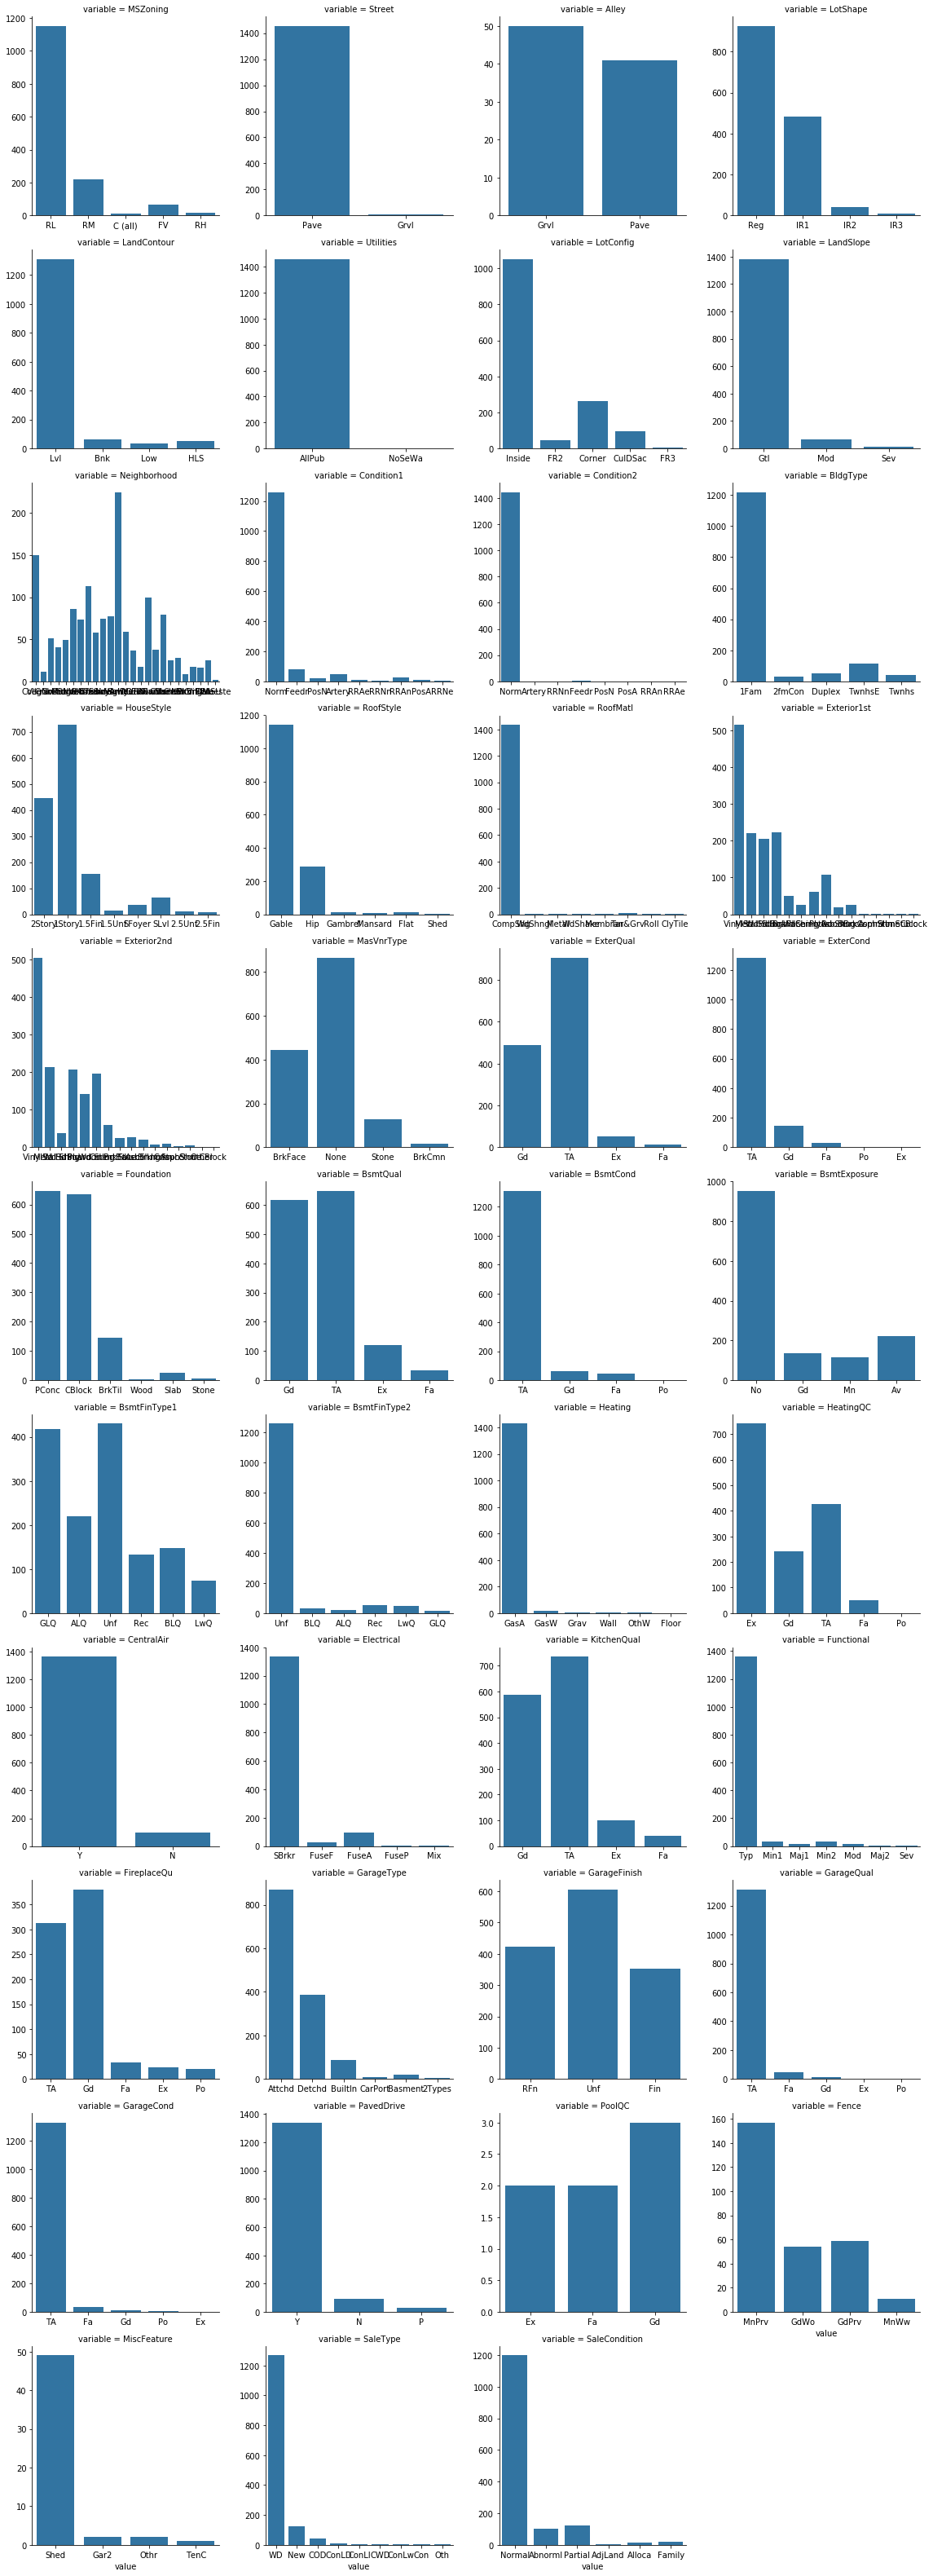

In [18]:
plot1 = pd.melt(data, value_vars=cf)  #categorical features distribution in terms of count
plot_num = sns.FacetGrid(plot1, col="variable",col_wrap=4, sharex=False, sharey=False, height = 4)
plot_num = plot_num.map(sns.countplot,"value")
plt.show()

In [19]:
numeric_data = list(nf)
categorical_data= list(cf)

In [20]:
#finding out the features with greater than 30% of non-null values and store them in a different data frame
#for further processing 

mod_df = data[[col for col in data if data[col].count()/len(data)>=0.3]]
max_null_cols = [cols for cols in data.columns if cols not in mod_df.columns]
for i in max_null_cols:
    print(i , data[str(i)].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


We can see that these features are the ones with the highest NaN values. Instead of removing these features we can simply perform feature engineering over the top of them as categorical values also hold importance in determining the predictions and analysis of the data properly.

In [21]:
# replacing the value of the NaN in the categorical features with the "Not Available" string to prepare it for
# data wrangling

for cols in categorical_data:
    data[str(cols)].fillna("Not Available", inplace=True)

In [22]:
#replace the NaN numerical values in the data with the median numerical values of the mod_df 
for cols in numeric_data:
    data[str(cols)].fillna(mod_df[str(cols)].median(), inplace=True)

### Checking a feature or two to understand the position of outliers in the data

<b>Bivariate analysis</b> to understand how the variables are following with the SalePrice

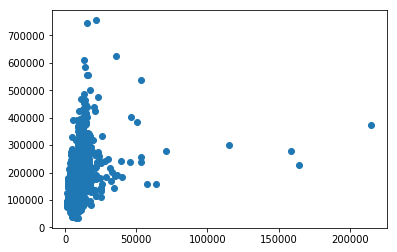

In [23]:
plt.scatter(x=data["LotArea"], y=data["SalePrice"])

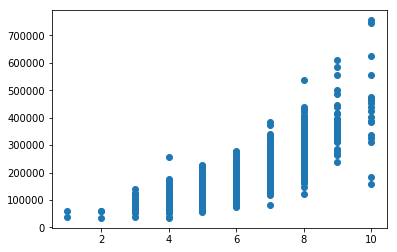

In [24]:
plt.scatter(x=data["OverallQual"], y=data["SalePrice"])   #similarly we can see the scatter plot for the Overall Quality as well 

We can perform univariate analysis as well which will give us the range of the average data and where it falls. Later zscore can be implemented on the standardized data (technique used to convert the data into the data with mean 0 and standard deviation of 1) to remove the outliers but here I am implementing the IQR method to remove the outliers.

### On observing we notice that the target variable SalePrice is not normally distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


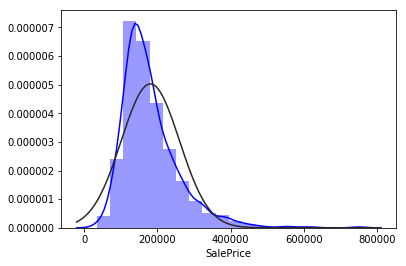

In [25]:
print(data['SalePrice'].describe())
sns.distplot(data['SalePrice'], color='blue', bins=20,fit=norm);

Let us see an example on the variable "SalePrice" where the data distribution is not normal. Since the skew is positive log transform can be easily applied

In [26]:
data['SalePrice'].skew(),data['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

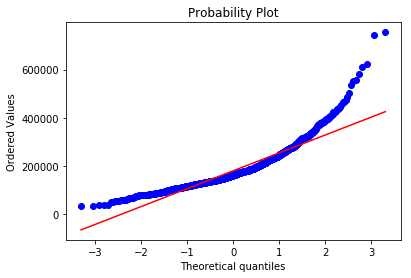

In [27]:
stats.probplot(data['SalePrice'], plot=plt)

### Take the log transform of the target variable to normalize it as the data was having skew and kurt both in order to increase the performance of ML regression models 

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

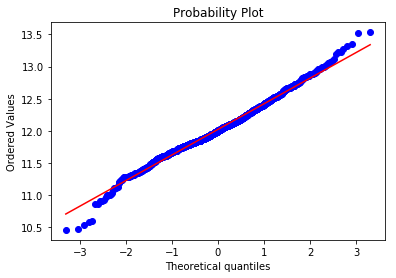

In [28]:
data['SalePrice'] = np.log(data['SalePrice'])
stats.probplot(data['SalePrice'], plot=plt)

<a id="feat"></a>
## FEATURE ENGINEERING

### Let us ask feature engineering and transforming for more help. 

> Now that we have removed the outliers and have also performed data wrangling, it time for performing feature engineering. We will take the object values and will replace them with the numerical values.
<br>
One hot encoding is one of the techniques that is required to perform.

In [29]:
def encode_categorical_variables(var, target):
        # make label to house price dictionary
        ordered_labels = data.groupby([var])[target].mean().sort_values().index
        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

        data[var] = data[var].map(ordinal_label)

for var in categorical_data:
    encode_categorical_variables(var, 'SalePrice')

<a id="corr"></a>

### Get the correlation for the  values/features that are closely related to the SalePrice feature as we want to know which feature alone can help in predicting the saleprice

In [30]:
numeric = data._get_numeric_data()
nf_corr = numeric.corr()
cor_target = abs(nf_corr["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Neighborhood    0.742641
OverallQual     0.817184
YearBuilt       0.586570
YearRemodAdd    0.565608
ExterQual       0.678840
Foundation      0.550411
BsmtQual        0.647718
TotalBsmtSF     0.612134
1stFlrSF        0.596981
GrLivArea       0.700927
FullBath        0.594771
KitchenQual     0.667893
TotRmsAbvGrd    0.534422
FireplaceQu     0.547151
GarageType      0.575628
GarageFinish    0.604878
GarageCars      0.680625
GarageArea      0.650888
SalePrice       1.000000
Name: SalePrice, dtype: float64

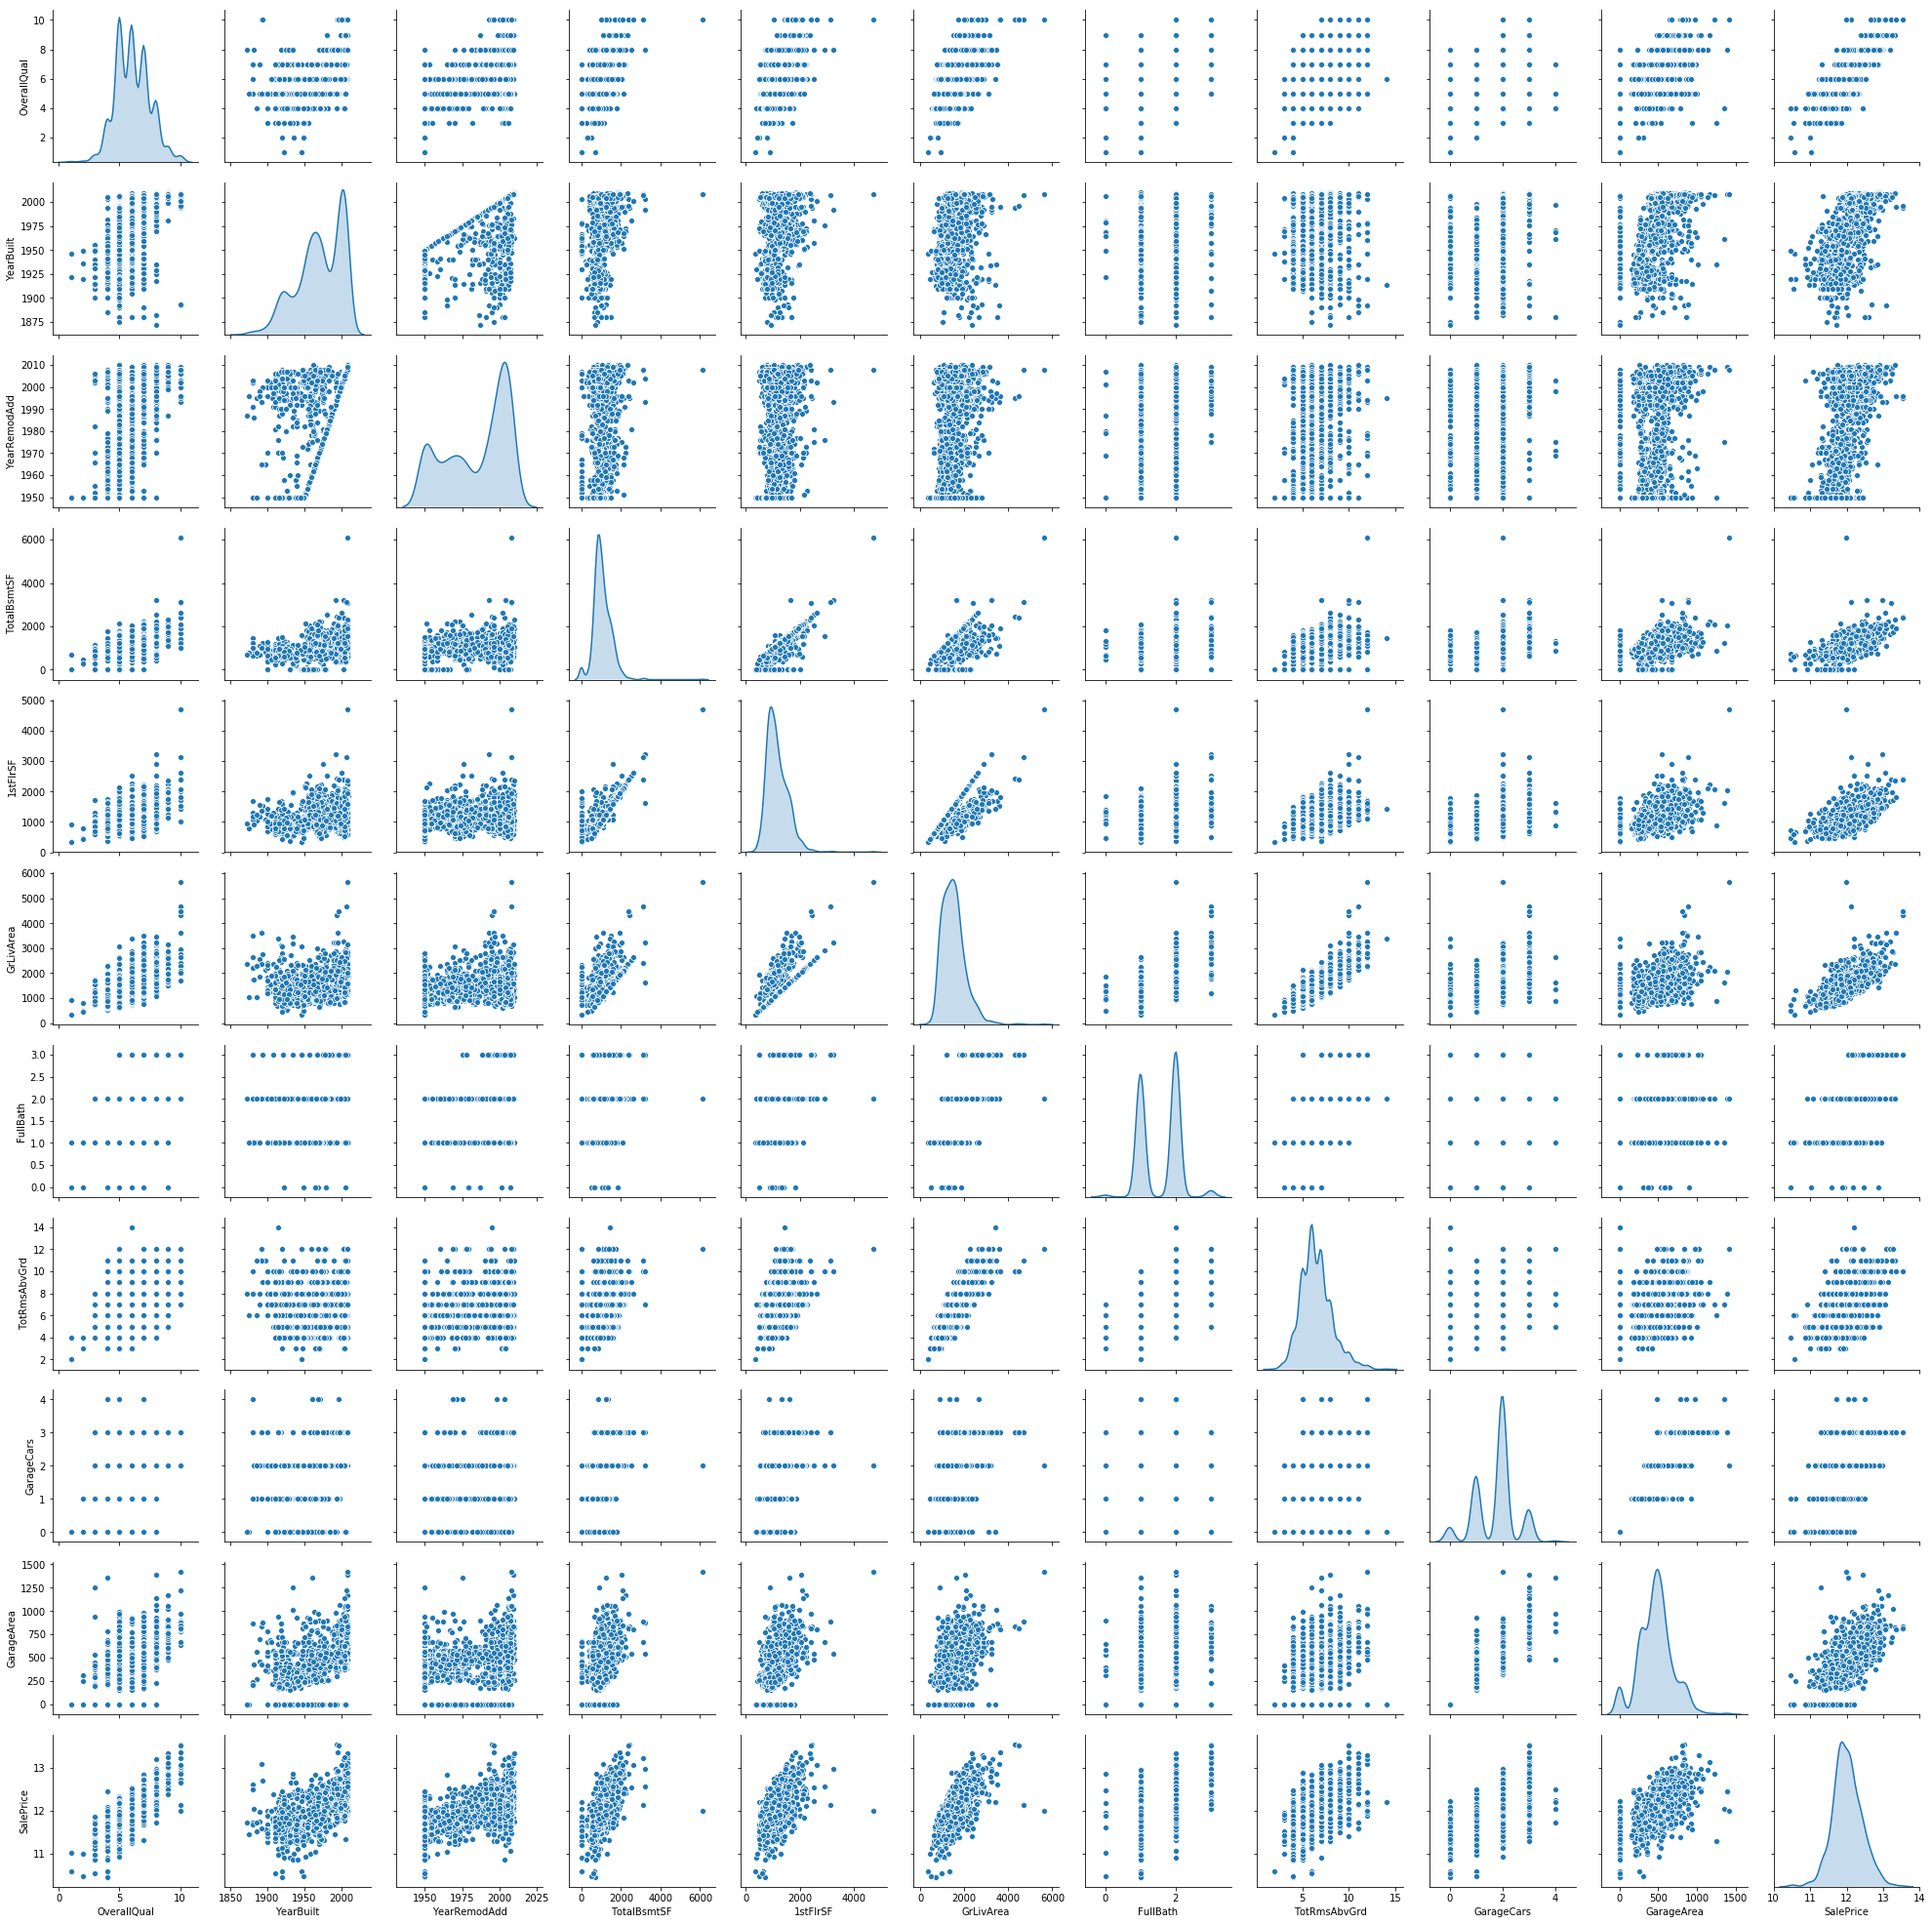

In [31]:
columns = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF', '1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','SalePrice']
sns.pairplot(data[columns],kind ='scatter',diag_kind='kde')

Here the highest correlated value is of Overall Quality feature i.e around 0.83 and the second highest is of the year in which the house was built

### Plot the zoomed correlation heatmap of Saleprice for better visualization

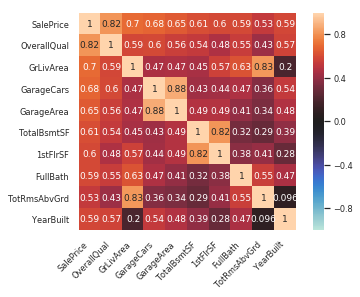

In [32]:
k = 10  #number of variables for heatmap with close correlation to the Sale Price Feature
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
corr_sale = np.corrcoef(data[cols].values.T)
sns.set(font_scale=0.75)
ax = sns.heatmap(
    corr_sale,
    vmin=-1, vmax=1, center=0,
    annot=True, 
    square=True
)
ax.set_xticklabels(
    cols.values,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    cols.values,
    rotation=0,
    horizontalalignment='right'
);

Looking at the heatmap we can deduce that the OverallQual, GrLivArea and GarageCars are the top 3 correlated values with the SalePrice. But we can also infer that the the variables GrLivArea and TotRmsAbvGrd are also highly correlated with each other with value 0.83. Similarly we can find out the correlated values amongst all the other features.

<a id="outliers"></a>

## GET THEM ALL - OUT LIARSSSSSS !!!!

> Knowing and readng the data is an important part and to get the outliers from the data is oneof the major steps to be performed for the cleaning of the data. <br>
Outliers are basically the data observations that are abnormally different or lies at an abnormal distance from the population (density) of the rest of the observations.<br>
The reason why I am removing the outliers is because I am going to use the regression models for the prediction of houseprices further and having outliers with extreme values or highly abnormal distance can effect the accuracy of the predictions. Also they can provide with the valuable information about the behaviour of specific features.
<br> 
> Here I am using the zscore method to calculate the outliers. zscore is the measure for a number of standard deviations from the mean of a datapoint.
One can also use IQR or local outlier probability algorithm to find out the outliers.

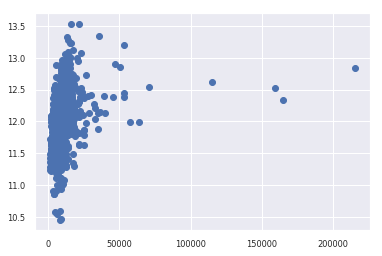

In [33]:
plt.scatter(x='LotArea', y='SalePrice', data=data)

In [34]:
z = stats.zscore(data)
threshold = 4  #decide the threshold depending upon the analysis of values, here it is 4 std deviations

In [35]:
data_df = data[(z < 4).all(axis=1)]

In [36]:
data_df.shape

(1176, 80)

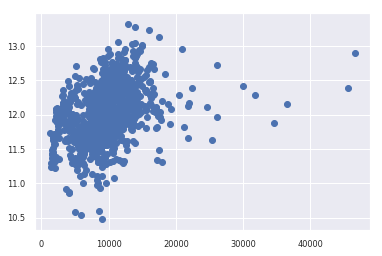

In [37]:
plt.scatter(x='LotArea', y='SalePrice', data=data_df)

<a id="two"></a>

## MODELLING FINALLY ! - 2nd Contribution

> For the 2nd contribution regression algorithm is required to be implemented. Here I am trying different regression models and will try to find out the best model out of all to demonstrate why a particular model has been chosen and why it is best on the following data.
<br>
<br>
Apply Gridsearch CV for better results as it finds the best parameters for the best results and implements the cross validation over the top of it. Fit the model and get the root mean square error and the score for each model.

In [38]:
from sklearn.model_selection import train_test_split   #import neccessary modules
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error   

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

### Acquire the data required for training by diving the data into the labels and the trainable features

In [39]:
X = data_df.drop(labels='SalePrice',axis=1)
y = data_df[['SalePrice']] 

#### Split the data into 80%-20% ratio where 80% belongs to the training data and 20% belongs to the data on top of which the testing has to be performed

In [40]:
train_Xs, test_Xs, train_ys, test_ys = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

> Transform the data such that the mean value is 0 and the standard deviation is 1 for the entire data such that the variance of one feature is not more than the rest of the features and it should not end up dominating or biasing our results.

In [41]:
scale=StandardScaler()  
train_X=scale.fit_transform(train_Xs)
test_X=scale.transform(test_Xs)
train_y=scale.fit_transform(train_ys)
test_y=scale.transform(test_ys)

In [42]:
models=[]
accuracy=[]

### Different regression models used here:

<ul>
    <li><b>Lasso Regression</b></li>
    <li><b>Random Forest Regression</b></li>
    <li><b>XGB Regression</b></li>
</ul>


### Lasso Regression

> LASSO stands for Least Absolute Shrinkage and Selection Operator and performs L1 regularization

In [43]:
lasso_regression = Lasso() #call the model and get the parameters 
print(lasso_regression.get_params())
param_grid_lasso = {'fit_intercept':[True,False], 
                 'normalize':[True,False], 
                 'copy_X':[True, False],
                 'alpha':[0.1]}

{'positive': False, 'copy_X': True, 'selection': 'cyclic', 'warm_start': False, 'alpha': 1.0, 'fit_intercept': True, 'tol': 0.0001, 'max_iter': 1000, 'normalize': False, 'random_state': None, 'precompute': False}


In [44]:
#implement the gridsearch cv for best model parameters and best scores i.e optimised model
grid_search_lasso = GridSearchCV(estimator=lasso_regression, param_grid = param_grid_lasso, 
                              cv=6, refit=True, verbose=1,n_jobs=-1) 

models.append("Lasso")

In [45]:
grid_search_lasso.fit(train_X,train_y)  #fit the model
m1 = grid_search_lasso.best_estimator_

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.7s finished


In [47]:
print("Score for Lasso Regression :", m1.score(test_X,test_y))#get the score on the model
accuracy.append(m1.score(test_X,test_y))

Score for Lasso Regression : 0.8855932765361956


In [48]:
trainlasso_pred = m1.predict(train_X)   #predict the values
testlasso_pred = m1.predict(test_X)

#get the scoring criterion i.e root mean square values for both training and testing data

train_error = round(np.sqrt(mean_squared_error(train_y,trainlasso_pred )),3)
test_error = round(np.sqrt(mean_squared_error(test_y,testlasso_pred)),3)
print('train error: {} | test error: {}'.format(train_error, test_error))

train error: 0.366 | test error: 0.351


Text(0, 0.5, 'Predictions')

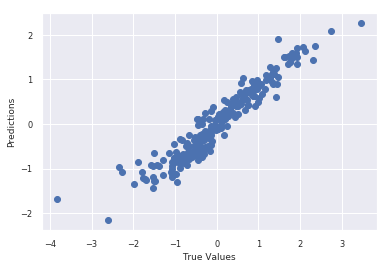

In [49]:
plt.scatter(test_y, testlasso_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Random Forest Regression

> A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging

In [50]:
rf_regression = RandomForestRegressor()
print(rf_regression.get_params())
param_grid_rf = {
                "max_features": ["auto", "sqrt", "log2"],
                "max_depth": [10,20,30],
                "random_state": [i for i in range(20)]
                }

{'min_weight_fraction_leaf': 0.0, 'random_state': None, 'max_depth': None, 'bootstrap': True, 'verbose': 0, 'warm_start': False, 'n_estimators': 'warn', 'n_jobs': None, 'min_impurity_split': None, 'max_leaf_nodes': None, 'criterion': 'mse', 'oob_score': False, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [51]:
grid_search_rf = GridSearchCV(estimator=rf_regression, param_grid = param_grid_rf, 
                              cv=6, refit=True, verbose=1,n_jobs=4)
models.append("Random Forest Regression")

In [52]:
grid_search_rf.fit(train_X,train_y)
m2 = grid_search_rf.best_estimator_

Fitting 6 folds for each of 180 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:   18.5s finished
/home/riya/phoenix/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/riya/phoenix/lib/python3.5/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [53]:
print("Score for Random Forest Regression :", m2.score(test_X,test_y))
accuracy.append(m2.score(test_X,test_y))

Score for Random Forest Regression : 0.9102025669438173


In [54]:
trainrf_pred = m2.predict(train_X)
testrf_pred = m2.predict(test_X)

In [55]:
#getting errors for the training and testing data for Random forest regression

train_error = round(np.sqrt(mean_squared_error(train_y,trainrf_pred )),3)
test_error = round(np.sqrt(mean_squared_error(testrf_pred,test_y)),3)
print('train error: {} | test error: {}'.format(train_error, test_error))

train error: 0.152 | test error: 0.311


Text(0, 0.5, 'Predictions')

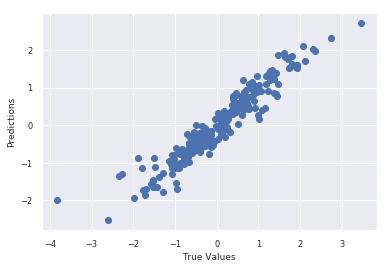

In [56]:
plt.scatter(test_y, testrf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

### XGB Regressor

> XGBoost stands for eXtreme Gradient Boosting. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [57]:
xgb_regression = xgb.XGBRegressor() 
print(xgb_regression.get_params()) 
param_grid_xgb = {'min_child_weight':[4,5],
                  'gamma':[1],
                  'n_estimators': [100],
                  'max_depth': [6],
                  'subsample': [0.8, 0.9, 1],
                  'reg_alpha': [0, 0.1, 0.3, 1],
                  'reg_lambda': [0, 1]
                  }

{'min_child_weight': 1, 'reg_lambda': 1, 'objective': 'reg:linear', 'scale_pos_weight': 1, 'missing': None, 'gamma': 0, 'colsample_bytree': 1, 'base_score': 0.5, 'n_estimators': 100, 'importance_type': 'gain', 'subsample': 1, 'learning_rate': 0.1, 'nthread': None, 'max_depth': 3, 'silent': None, 'colsample_bylevel': 1, 'max_delta_step': 0, 'seed': None, 'random_state': 0, 'n_jobs': 1, 'booster': 'gbtree', 'colsample_bynode': 1, 'verbosity': 1, 'reg_alpha': 0}


In [58]:
grid_search_xgb = GridSearchCV(estimator=xgb_regression, param_grid = param_grid_xgb, cv=6, refit=True, verbose=1,n_jobs=4)
models.append("XGB Regression")

In [59]:
grid_search_xgb.fit(train_X,train_y)
m3 = grid_search_xgb.best_estimator_

Fitting 6 folds for each of 48 candidates, totalling 288 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed:   51.0s finished


[23:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
print("Score for XGB Regression :", m3.score(test_X,test_y)) 
accuracy.append(m3.score(test_X,test_y))

Score for XGB Regression : 0.924055658851495


In [61]:
trainxgb_pred = grid_search_xgb.predict(train_X) 
testxgb_pred = grid_search_xgb.predict(test_X)

In [62]:
train_error = round(np.sqrt(mean_squared_error(trainxgb_pred,train_y)),3) 
test_error = round(np.sqrt(mean_squared_error(testxgb_pred,test_y)),3) 
print('train error: {} | test error: {}'.format(train_error, test_error))

train error: 0.223 | test error: 0.286


Text(0, 0.5, 'Predictions')

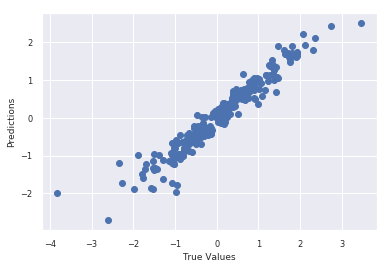

In [63]:
plt.scatter(test_y, testxgb_pred) 
plt.xlabel('True Values') 
plt.ylabel('Predictions')

### Here we can see the scores out of the three models is the highest for the XGB Regressor

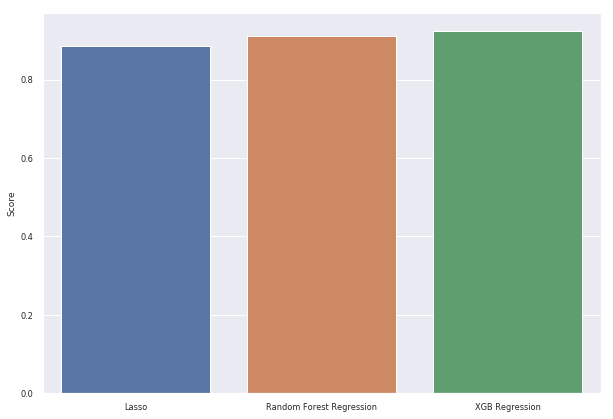

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=models, y=accuracy, ax=ax)
plt.ylabel('Score')
plt.show()

### Get the best features using the feature importance method using XGB Regressor as it has the highest score

In [65]:
best_features = grid_search_xgb.best_estimator_.feature_importances_
best_features = pd.DataFrame({
                    "variable" : train_Xs.columns,
                    "importance":best_features
})

best_features = best_features.sort_values("importance",ascending=False)
best_features.head(10)

,importance,variable
16,0.300032,OverallQual
60,0.095336,GarageCars
11,0.055977,Neighborhood
57,0.045075,GarageType
45,0.033116,GrLivArea
52,0.032956,KitchenQual
40,0.029915,CentralAir
29,0.025276,BsmtQual
48,0.025272,FullBath
56,0.022415,FireplaceQu


<a id="conc"></a>
# Conclusion

> ### We saw via the correlation matrix that the feature "OverAllQual" is the highest with 0.81 correlation. Using the ML modelling technique too, we can see the highest correlating feature is OverallQual with 0.30. <br> Hence, OverAllQual is the single feature field that can be used for describing the "SalePrice" field.